**Notebook elaborado por:**

*   Wilson Antony Mamani Machaca (wilson.antony.mm@gmail.com)
*   Jose Emmanuel Cruz de la Cruz (jeccruz@yahoo.com)



**Importar Librerias**

In [ ]:
#Libreria especializada en el manejo y análisis de estructuras de datos
import pandas as pd
#Libreria especializada en el cálculo numérico y el análisis de datos
import numpy as np
#Libreria especializada en la creación de gráficos
import matplotlib.pyplot as plt
#Libreria para la división de Data en: "Train" y "Test"
from sklearn.model_selection import train_test_split
#Libreria para importar el algoritmo de regresión lineal tipo OLS
from sklearn.linear_model import LinearRegression
#Libreria para importar el algoritmo de regresión lineal tipo Ridge
from sklearn.linear_model import Ridge
#Libreria para importar el algoritmo de regresión lineal tipo Lasso
from sklearn.linear_model import Lasso
#Libreria para importar el algoritmo de regresión lineal tipo Lasso
from sklearn.linear_model import ElasticNet
#Librerira para encontrar los valores para estas métricas usando nuestros datos de prueba
from sklearn import metrics

**Cargar Data Set**

In [ ]:
#Cargar datos del archivo CSV
cargar_archivo = pd.read_csv('petrol_consumption.csv')
#Convertir archivo en DataFrame
data = pd.DataFrame(cargar_archivo)

**Visualizar Data**

In [ ]:
data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


**Viasualizar Data con comando "Head"**

In [ ]:
data.head(3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561


**Descripcion estadistica de la Data**

In [ ]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


**Definimos variables para realizar la regresión**

In [ ]:
#Dividimos la data en Variables dependientes e independientes

#Variables independientes -> X
X = data[['Petrol_tax',
          'Average_income',
          'Paved_Highways',
          'Population_Driver_licence(%)']]
#Variable dependiente -> Y
Y = data['Petrol_Consumption']

In [ ]:
#Visualizamos parte de la variable X
X.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [ ]:
#Visualizamos parte de la variable X
Y.head(5)

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

**Dividir la Data en Train y Test -> 80% y 20% Respectivamente**

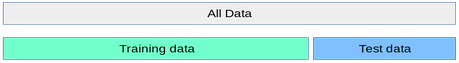

In [ ]:
#Porcentaje en la división utilizada: 0.2 = 20% (Test)
porcentaje = 0.2

In [ ]:
#Parametro generador de números aleatorios para aleatorizar la data de Train y Test
semilla = 100

In [ ]:
#Dividir Data con parametros
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=porcentaje, random_state=semilla)

**Modelo de Regresión Lineal**

In [ ]:
#Declarar el modelo en la variable "reg"
reg = LinearRegression() #OLS
#reg = Ridge(alpha=0.01) #Ridge|Alpha=Fuerza de regularización.
#reg = Lasso() #Lasso|Alpha=Constante que multiplica el término L1.
#reg = ElasticNet(l1_ratio=0.5) #ElasticNet|l1_ratio=Combinación de L1 y L2 (0 <= l1_ratio <= 1)
#Entrenar el modelo con el comando "fit" a las variables -> X_train, y_train
reg.fit(X_train, y_train)

LinearRegression()

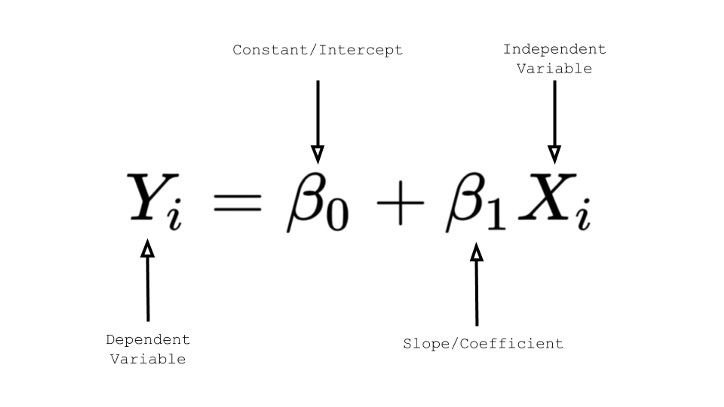

In [ ]:
#Imprimir la constante de la formula
print(reg.intercept_)

481.6307045301571


In [ ]:
#Imprimir el coeficiente de la formula
print(reg.coef_)

[-3.70661890e+01 -8.02141438e-02 -2.27414176e-03  1.28442090e+03]


**Medir rendimiento del modelo**

In [ ]:
#Datos predecidos
y_pred = reg.predict(X_test)
y_pred

array([310.72647078, 558.70532501, 666.96404634, 600.10738362,
       642.97098064, 560.32488051, 412.83775821, 658.79239232,
       760.34665877, 598.72586847])

In [ ]:
#Datos actuales
y_test

6     344
28    574
32    577
26    577
41    699
47    524
5     457
40    587
18    865
31    554
Name: Petrol_Consumption, dtype: int64

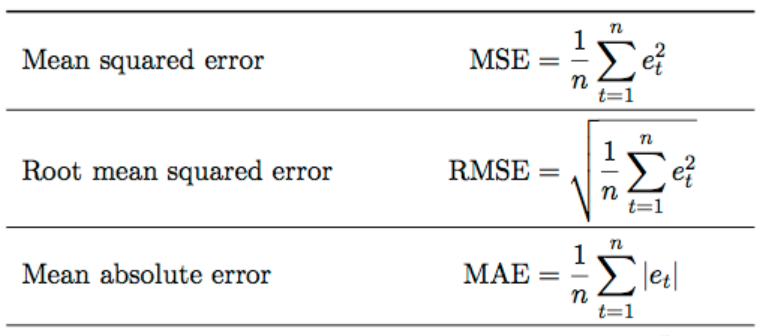

In [ ]:
#Calculamos el MSE
MSE = metrics.mean_squared_error(y_test, y_pred)
#Calculamos el RMSE
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#Calculamos el MAE
MAE = metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
#Imprimimos los valores
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('Mean Absolute Error:', MAE)

Mean Squared Error: 3448.4459932569357
Root Mean Squared Error: 58.72347054846925
Mean Absolute Error: 51.93273778529323


In [ ]:
#Calculamos la precisión del modelo
precision = reg.score(X_test, y_test)
#Imprimimos la precisión del modelo
print('Precisión: ', precision)

Precisión:  0.7970900788670914


###Linealidad

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


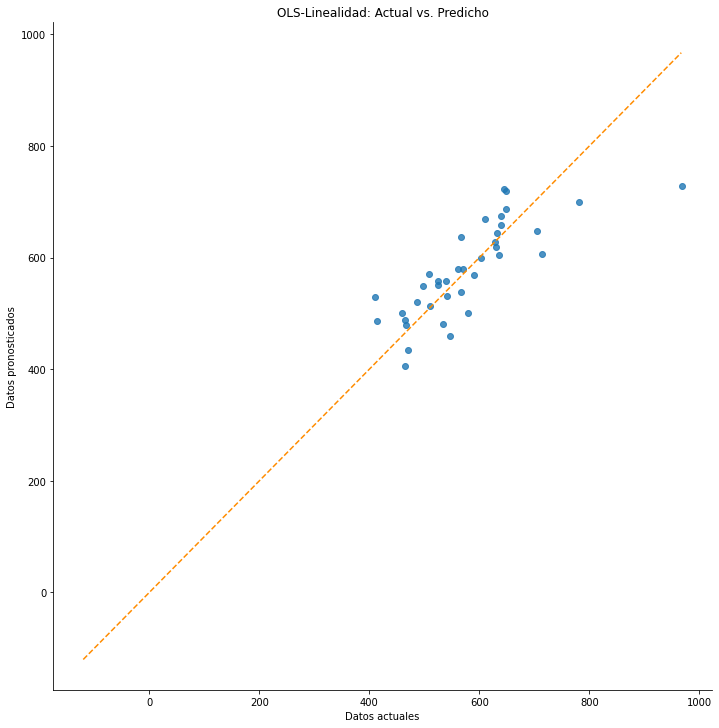

In [ ]:
import seaborn as sns
import time

def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results

def linear_assumption(model, features, label, titulo1):
    df_results = calculate_residuals(model, features, label)
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=10)
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.xlabel("Datos actuales")
    plt.ylabel("Datos pronosticados")
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title(titulo1)

linear_assumption(reg, X_train, y_train, "OLS-Linealidad: Actual vs. Predicho")

###Normality of the Error Terms

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Los residuos se distribuyen normalmente  OLS-Distribución de Residuos


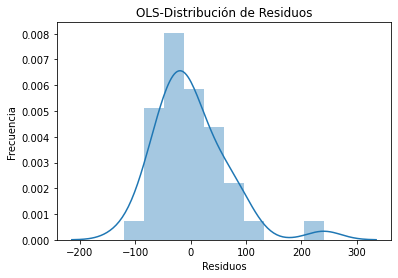

In [ ]:
def normal_errors_assumption(model, features, label, p_value_thresh , titulo2):
    from statsmodels.stats.diagnostic import normal_ad
    df_results = calculate_residuals(model, features, label)
    p_value = normal_ad(df_results['Residuals'])[1]
    if p_value < p_value_thresh:
        print('Los residuos no se distribuyen normalmente: ', titulo2)
    else:
        print('Los residuos se distribuyen normalmente ', titulo2)

    plt.title(titulo2)
    sns.distplot(df_results['Residuals'])
    plt.xlabel("Residuos")
    plt.ylabel("Frecuencia")
    plt.show()

normal_errors_assumption(reg, X_train, y_train, 0.05 ,"OLS-Distribución de Residuos")

###Correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


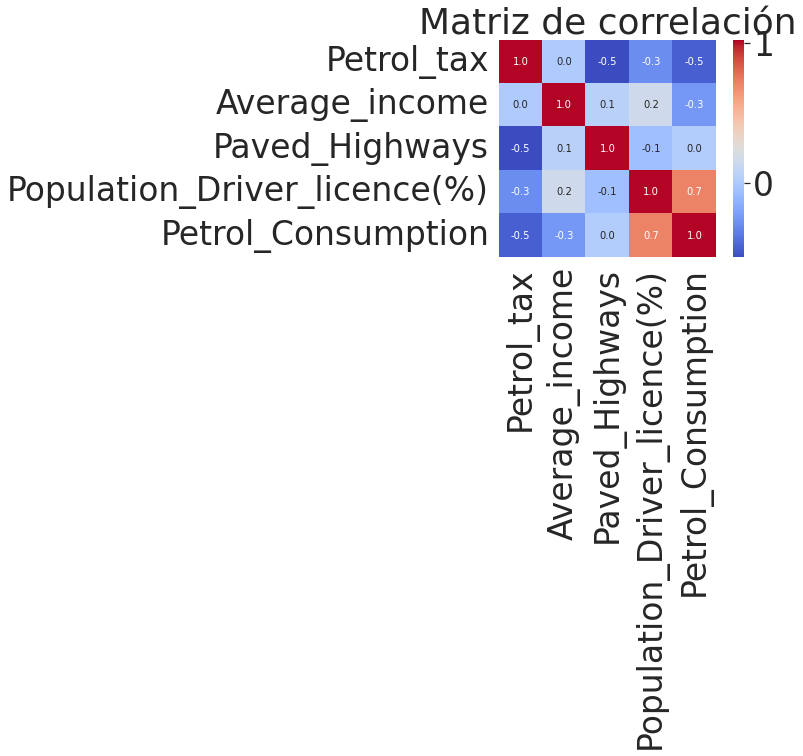

In [ ]:
cols = ['Petrol_tax',
        'Average_income',
        'Paved_Highways',
        'Population_Driver_licence(%)',
        'Petrol_Consumption']
from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(data.iloc[:,range(0,5)].values)
cov_mat =np.cov(X_std.T)
sns.set(font_scale=3)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.1f',
                 annot_kws={'size': 10},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

###Autocorrelation

In [ ]:
#Los valores de 1.5 < d <2.5 generalmente muestran que no hay autocorrelación en los datos.

def autocorrelation_assumption(model, features, label, titulo3):

    print("##############", titulo3 , "################")
    from statsmodels.stats.stattools import durbin_watson
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signos de autocorrelación positiva')
        print('Supuesto no satisfecho')
    elif durbinWatson > 2.5:
        print('Signos de autocorrelación negativa.')
        print('Supuesto no satisfecho')
    else:
        print('Poca o ninguna autocorrelación')
        print('Supuesto satisfecho')

autocorrelation_assumption(reg, X_train, y_train, "OLS-autocorrelation")

############## OLS-autocorrelation ################
Durbin-Watson: 1.9534374147530629
Poca o ninguna autocorrelación
Supuesto satisfecho


###Homoscedasticity

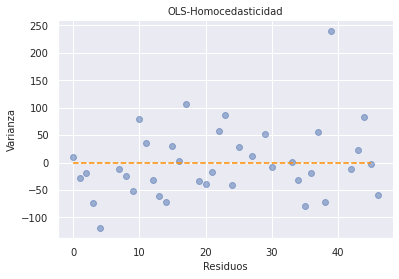

In [ ]:
def homoscedasticity_assumption(model, features, label, titulo4):
    df_results = calculate_residuals(model, features, label)
    ax = plt.subplot(111)
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.xlabel("Residuos", fontsize=10)
    plt.ylabel("Varianza", fontsize=10)
    plt.title(titulo4, size=10)
    plt.show()

homoscedasticity_assumption(reg, X_train, y_train, "OLS-Homocedasticidad")